In [ ]:
import pandas as pd

aapl_df = pd.read_csv('AAPL Historical Data.csv')
amzn_df = pd.read_csv('AMZN Historical Data.csv')
fb_df = pd.read_csv('FB Historical Data.csv')
googl_df = pd.read_csv('GOOGL Historical Data.csv')
nflx_df = pd.read_csv('NFLX Historical Data.csv')

aapl_df['Symbol'] = 'AAPL'
amzn_df['Symbol'] = 'AMZN'
fb_df['Symbol'] = 'FB'
googl_df['Symbol'] = 'GOOGL'
nflx_df['Symbol'] = 'NFLX'

data = pd.concat([aapl_df, amzn_df, fb_df, googl_df, nflx_df])

start_date = '2015-01-01'
end_date = '2022-09-14'
data = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

data.to_csv('new_dataset.csv', index=False)


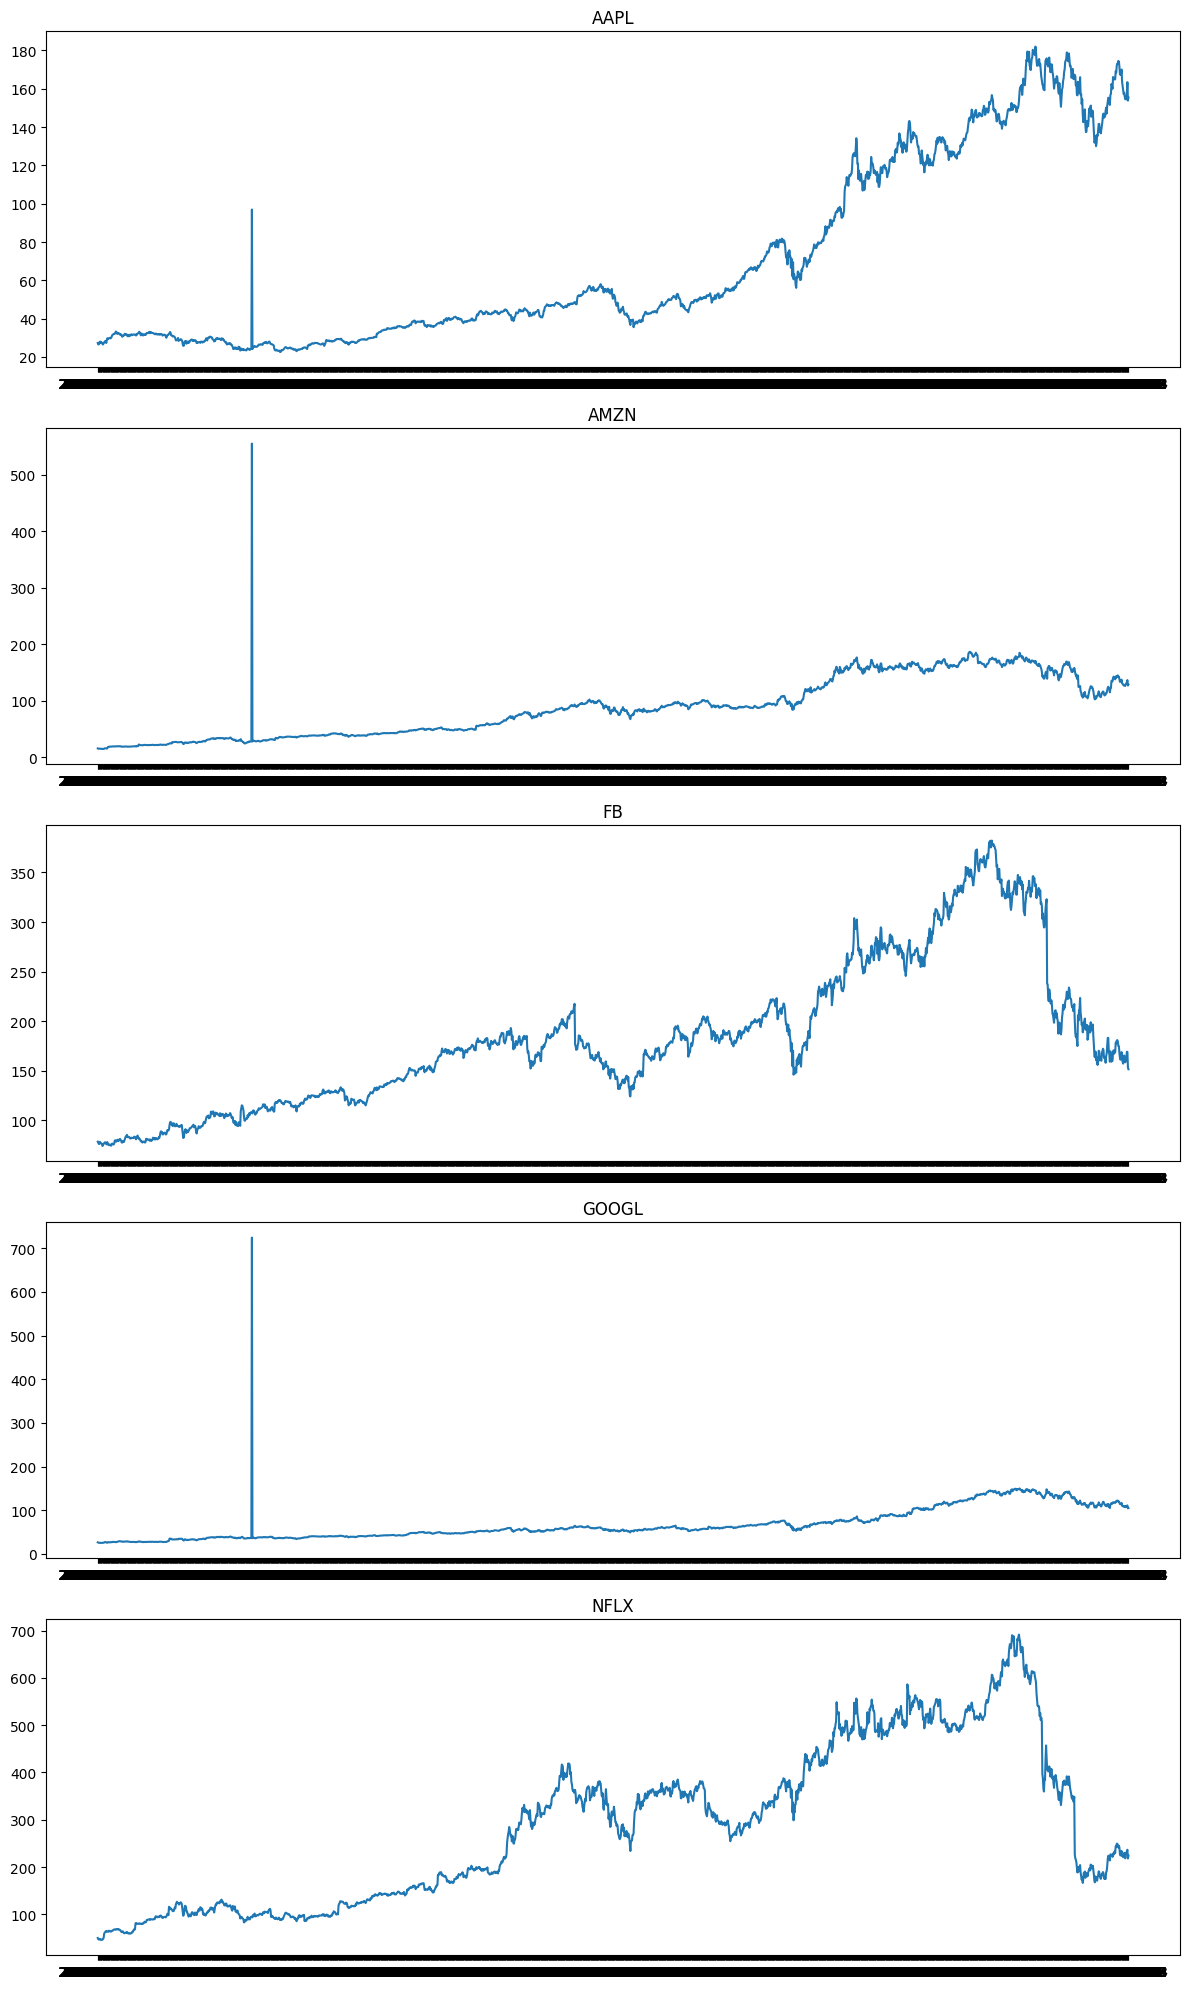

In [5]:
import pandas as pd

import matplotlib.pyplot as plt

new_data = pd.read_csv('new_dataset.csv')

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 20))
symbols = new_data['Symbol'].unique()

for i, symbol in enumerate(symbols):
    df = new_data.loc[new_data['Symbol'] == symbol]
    axs[i].plot(df['Date'], df['Close'])
    axs[i].set_title(symbol)

plt.tight_layout()
plt.show()


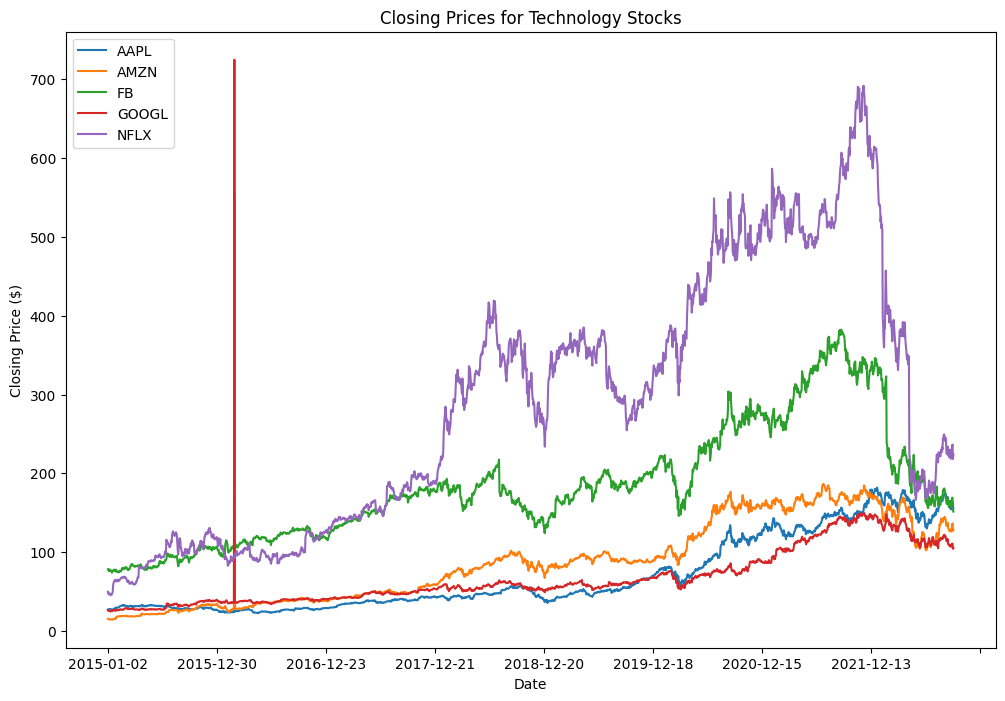

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

aapl_df = pd.read_csv('AAPL Historical Data.csv')
amzn_df = pd.read_csv('AMZN Historical Data.csv')
fb_df = pd.read_csv('FB Historical Data.csv')
googl_df = pd.read_csv('GOOGL Historical Data.csv')
nflx_df = pd.read_csv('NFLX Historical Data.csv')

aapl_df['Symbol'] = 'AAPL'
amzn_df['Symbol'] = 'AMZN'
fb_df['Symbol'] = 'FB'
googl_df['Symbol'] = 'GOOGL'
nflx_df['Symbol'] = 'NFLX'

data = pd.concat([aapl_df, amzn_df, fb_df, googl_df, nflx_df])

start_date = '2015-01-01'
end_date = '2022-09-14'
data = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

pivoted_data = data.pivot(index='Date', columns='Symbol', values='Close')

fig, ax = plt.subplots(figsize=(12,8))

pivoted_data.plot(ax=ax)

ax.set_xlabel('Date')
ax.set_ylabel('Closing Price ($)')
ax.set_title('Closing Prices for Technology Stocks')
ax.legend(loc='upper left')

plt.show()


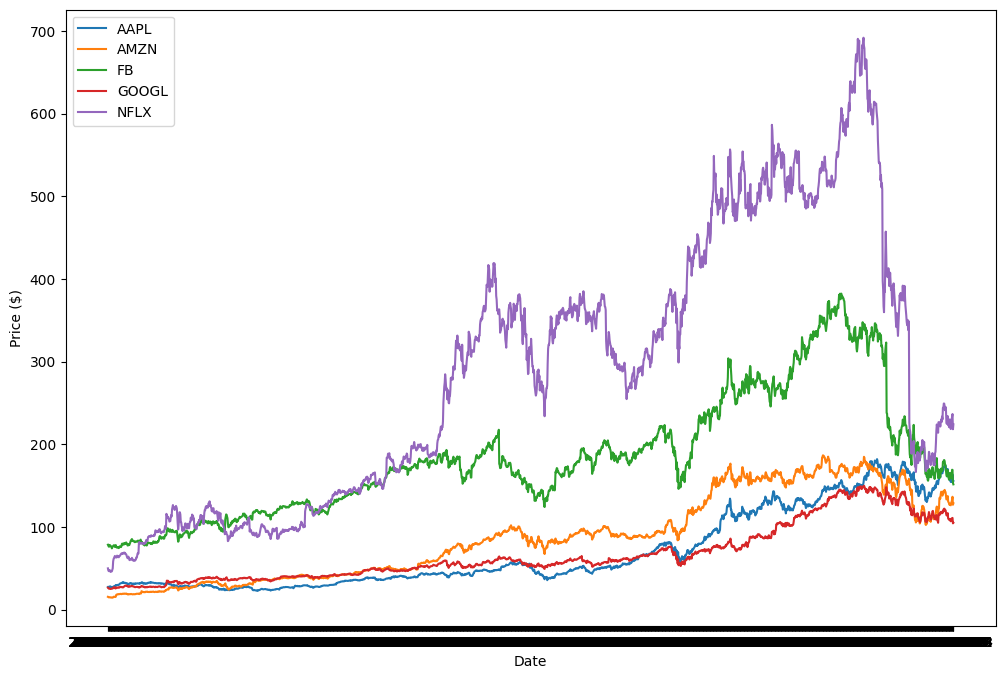

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

aapl_df = pd.read_csv('AAPL Historical Data.csv')
amzn_df = pd.read_csv('AMZN Historical Data.csv')
fb_df = pd.read_csv('FB Historical Data.csv')
googl_df = pd.read_csv('GOOGL Historical Data.csv')
nflx_df = pd.read_csv('NFLX Historical Data.csv')

aapl_df['Symbol'] = 'AAPL'
amzn_df['Symbol'] = 'AMZN'
fb_df['Symbol'] = 'FB'
googl_df['Symbol'] = 'GOOGL'
nflx_df['Symbol'] = 'NFLX'

data = pd.concat([aapl_df, amzn_df, fb_df, googl_df, nflx_df])

start_date = '2015-01-01'
end_date = '2022-09-14'
data = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

pivoted_data = data.pivot(index='Date', columns='Symbol', values='Close')

z_scores = np.abs((pivoted_data - pivoted_data.mean()) / pivoted_data.std())
pivoted_data = pivoted_data[(z_scores < 3).all(axis=1)]

fig, ax = plt.subplots(figsize=(12,8))

for symbol in pivoted_data.columns:
    ax.plot(pivoted_data.index, pivoted_data[symbol], label=symbol)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.legend(loc='upper left')

plt.show()


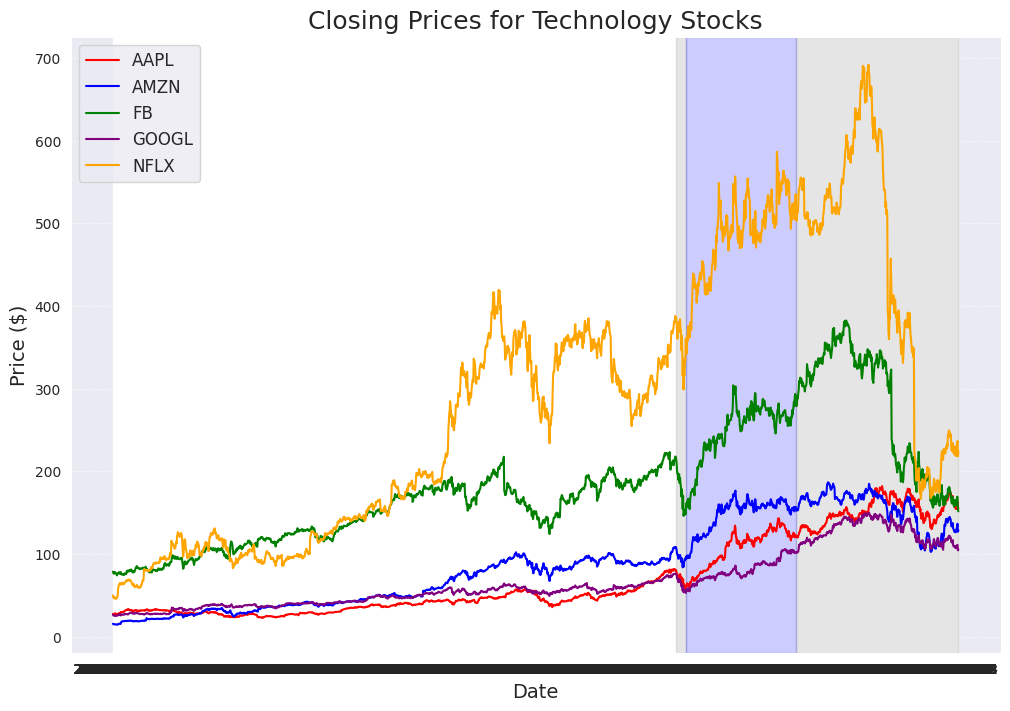

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

aapl_df = pd.read_csv('AAPL Historical Data.csv')
amzn_df = pd.read_csv('AMZN Historical Data.csv')
fb_df = pd.read_csv('FB Historical Data.csv')
googl_df = pd.read_csv('GOOGL Historical Data.csv')
nflx_df = pd.read_csv('NFLX Historical Data.csv')

aapl_df['Symbol'] = 'AAPL'
amzn_df['Symbol'] = 'AMZN'
fb_df['Symbol'] = 'FB'
googl_df['Symbol'] = 'GOOGL'
nflx_df['Symbol'] = 'NFLX'

data = pd.concat([aapl_df, amzn_df, fb_df, googl_df, nflx_df])

start_date = '2015-01-01'
end_date = '2022-09-14'
data = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

pivoted_data = data.pivot(index='Date', columns='Symbol', values='Close')

z_scores = np.abs((pivoted_data - pivoted_data.mean()) / pivoted_data.std())
pivoted_data = pivoted_data[(z_scores < 3).all(axis=1)]

fig, ax = plt.subplots(figsize=(12,8))

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i, symbol in enumerate(pivoted_data.columns):
    ax.plot(pivoted_data.index, pivoted_data[symbol], color=colors[i], label=symbol)

ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price ($)', fontsize=14)
ax.set_title('Closing Prices for Technology Stocks', fontsize=18)
ax.legend(loc='upper left', fontsize=12)

ax.axvspan('2020-02-19', '2020-03-23', alpha=0.2, color='gray')
ax.axvspan('2020-03-23', '2021-03-23', alpha=0.2, color='blue')
ax.axvspan('2021-03-23', '2022-09-14', alpha=0.2, color='gray')

ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


Data shape: (9700, 7)

Data types:
 Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Symbol     object
dtype: object

Missing values:
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Symbol    0
dtype: int64

Summary statistics:
               Open         High          Low        Close        Volume
count  9700.000000  9700.000000  9700.000000  9700.000000  9.700000e+03
mean    139.417877   141.232668   137.529008   139.428227  5.716630e+07
std     122.988149   124.776052   121.071084   122.943255  5.892155e+07
min      14.310000    14.540000    14.260000    14.350000  0.000000e+00
25%      49.837500    50.197500    49.387500    49.797500  1.683152e+07
50%     103.185000   104.895000   101.720000   103.665000  3.571971e+07
75%     171.255000   173.200000   169.305000   171.272500  8.060547e+07
max     724.440000   724.620000   724.440000   724.620000  6.488252e+08


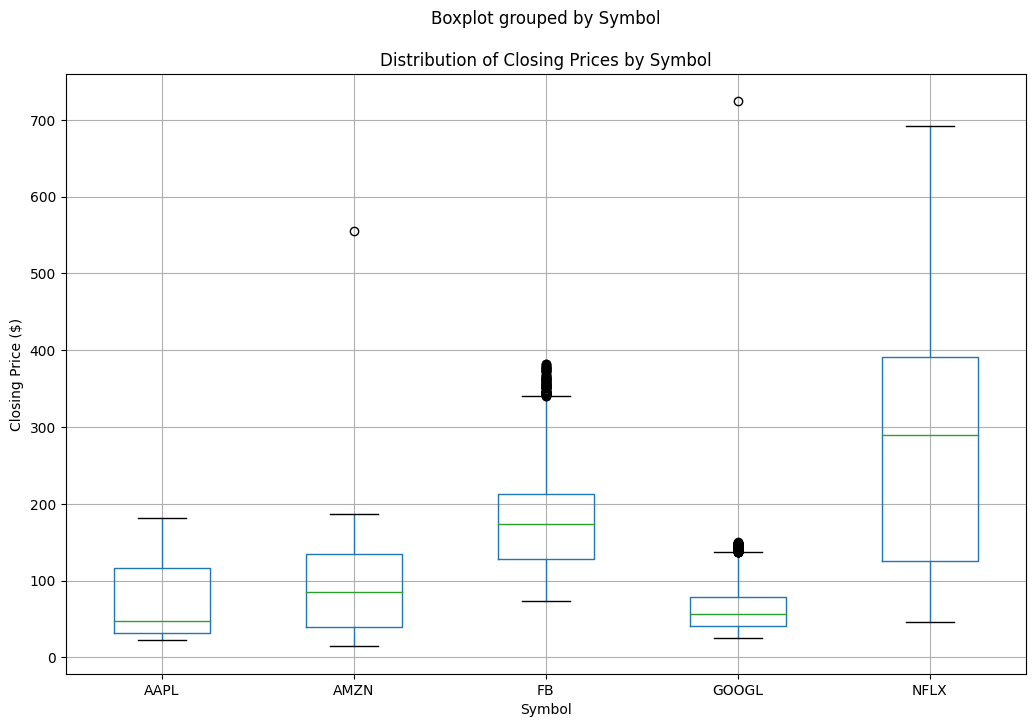

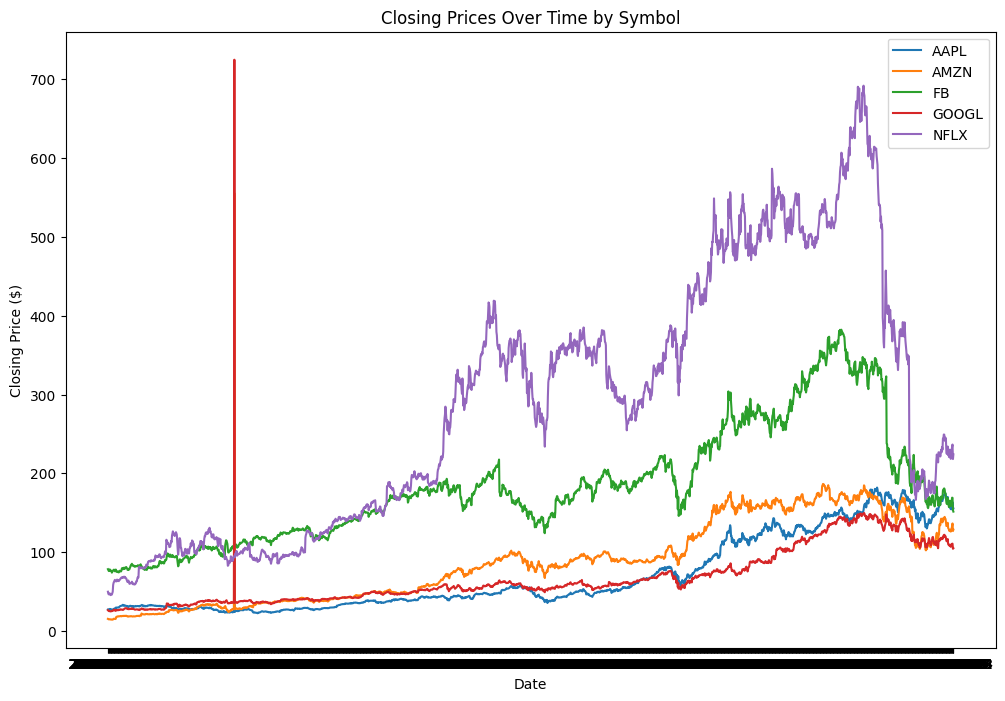

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('new_dataset.csv')

print('Data shape:', data.shape)
print('\nData types:\n', data.dtypes)

print('\nMissing values:\n', data.isna().sum())

print('\nSummary statistics:\n', data.describe())

fig, ax = plt.subplots(figsize=(12,8))
data.boxplot(column=['Close'], by='Symbol', ax=ax)
plt.title('Distribution of Closing Prices by Symbol')
plt.ylabel('Closing Price ($)')
plt.show()

fig, ax = plt.subplots(figsize=(12,8))
for symbol in data['Symbol'].unique():
    symbol_data = data[data['Symbol'] == symbol]
    ax.plot(symbol_data['Date'], symbol_data['Close'], label=symbol)
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.title('Closing Prices Over Time by Symbol')
plt.show()


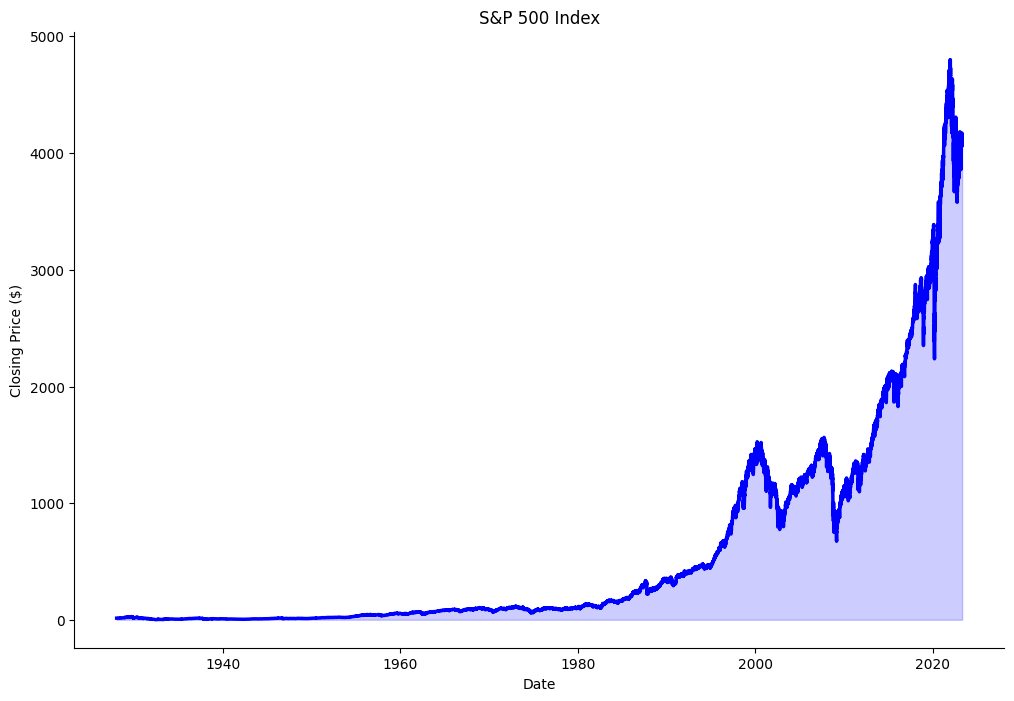

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

sp500 = yf.Ticker('^GSPC')
data = sp500.history(period='max')

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(data=data, x=data.index, y="Close", ax=ax, linewidth=2.5, color="blue")

ax.set_title('S&P 500 Index')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price ($)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.fill_between(data.index, data['Close'].min(), data['Close'], alpha=0.2, color='blue')

plt.show()


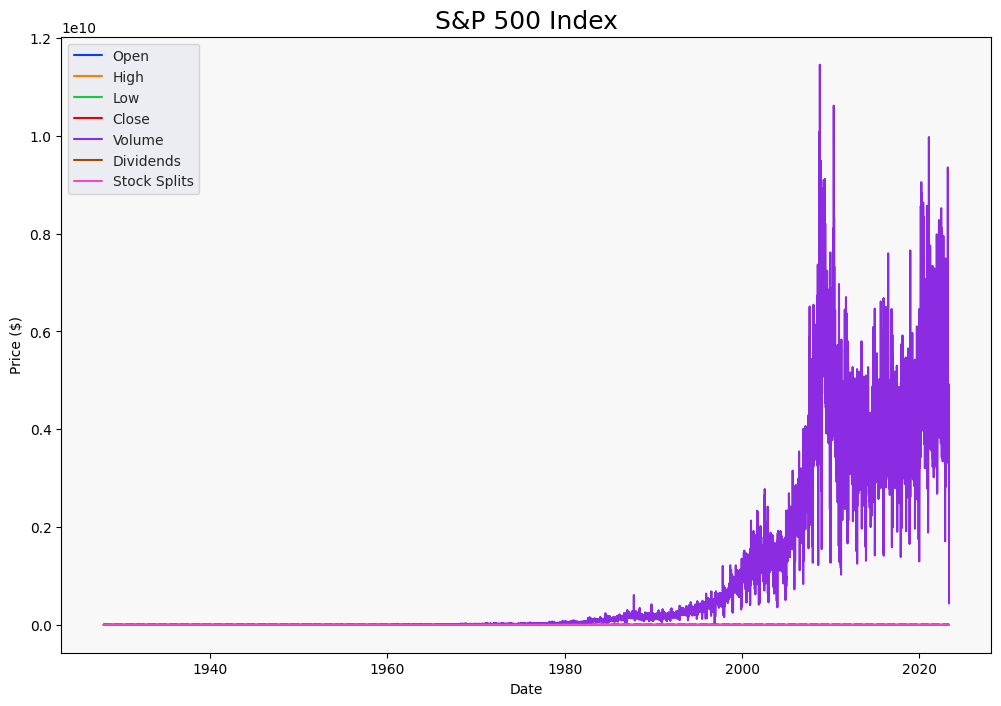

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

gspc = yf.Ticker('^GSPC')
data = gspc.history(period='max')

fig, ax = plt.subplots(figsize=(12,8))

sns.set_style("darkgrid")
palette = sns.color_palette("bright", len(data.columns))

for symbol, color in zip(data.columns, palette):
    ax.plot(data.index, data[symbol], label=symbol, color=color)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('S&P 500 Index', fontsize=18)
ax.legend(loc='upper left')

lines = ax.lines
lines[0].set_linestyle("--")
lines[1].set_linestyle(":")
lines[2].set_linestyle("-.")
lines[3].set_linestyle("--")
lines[4].set_linestyle("-")

ax.set_facecolor("#f8f8f8")

plt.show()



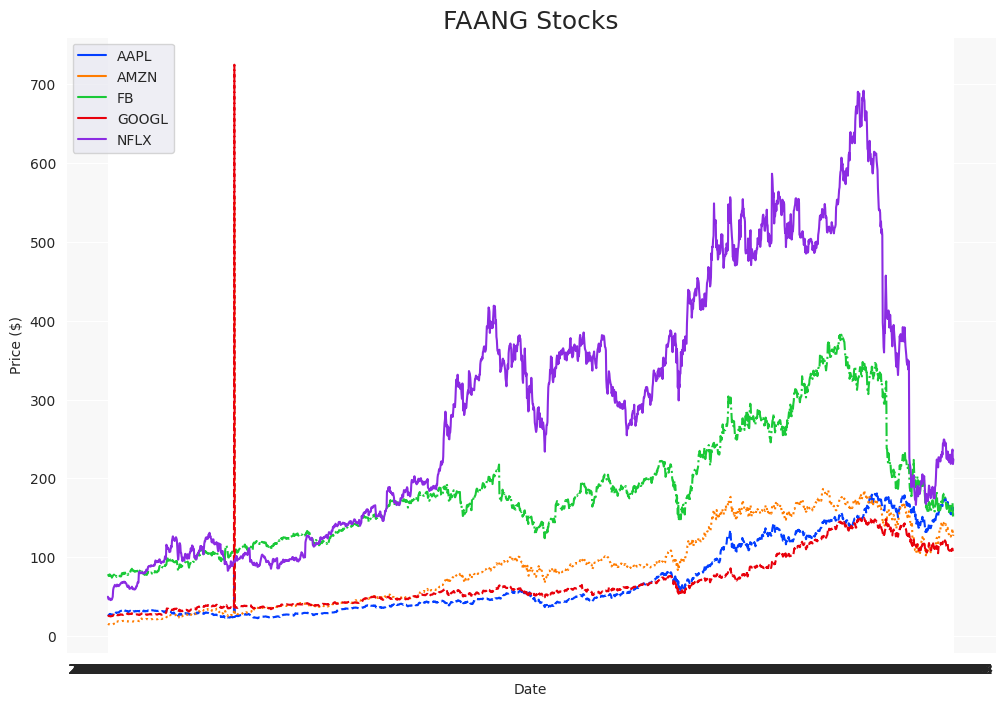

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('new_dataset.csv')

data_pivot = data.pivot(index='Date', columns='Symbol', values='Close')

fig, ax = plt.subplots(figsize=(12,8))

sns.set_style("darkgrid")
palette = sns.color_palette("bright", len(data_pivot.columns))

for symbol, color in zip(data_pivot.columns, palette):
    ax.plot(data_pivot.index, data_pivot[symbol], label=symbol, color=color)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('FAANG Stocks', fontsize=18)
ax.legend(loc='upper left')

lines = ax.lines
lines[0].set_linestyle("--")
lines[1].set_linestyle(":")
lines[2].set_linestyle("-.")
lines[3].set_linestyle("--")
lines[4].set_linestyle("-")

ax.set_facecolor("#f8f8f8")

plt.show()


Got error from yahoo api for ticker FB, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- FB: No timezone found, symbol may be delisted


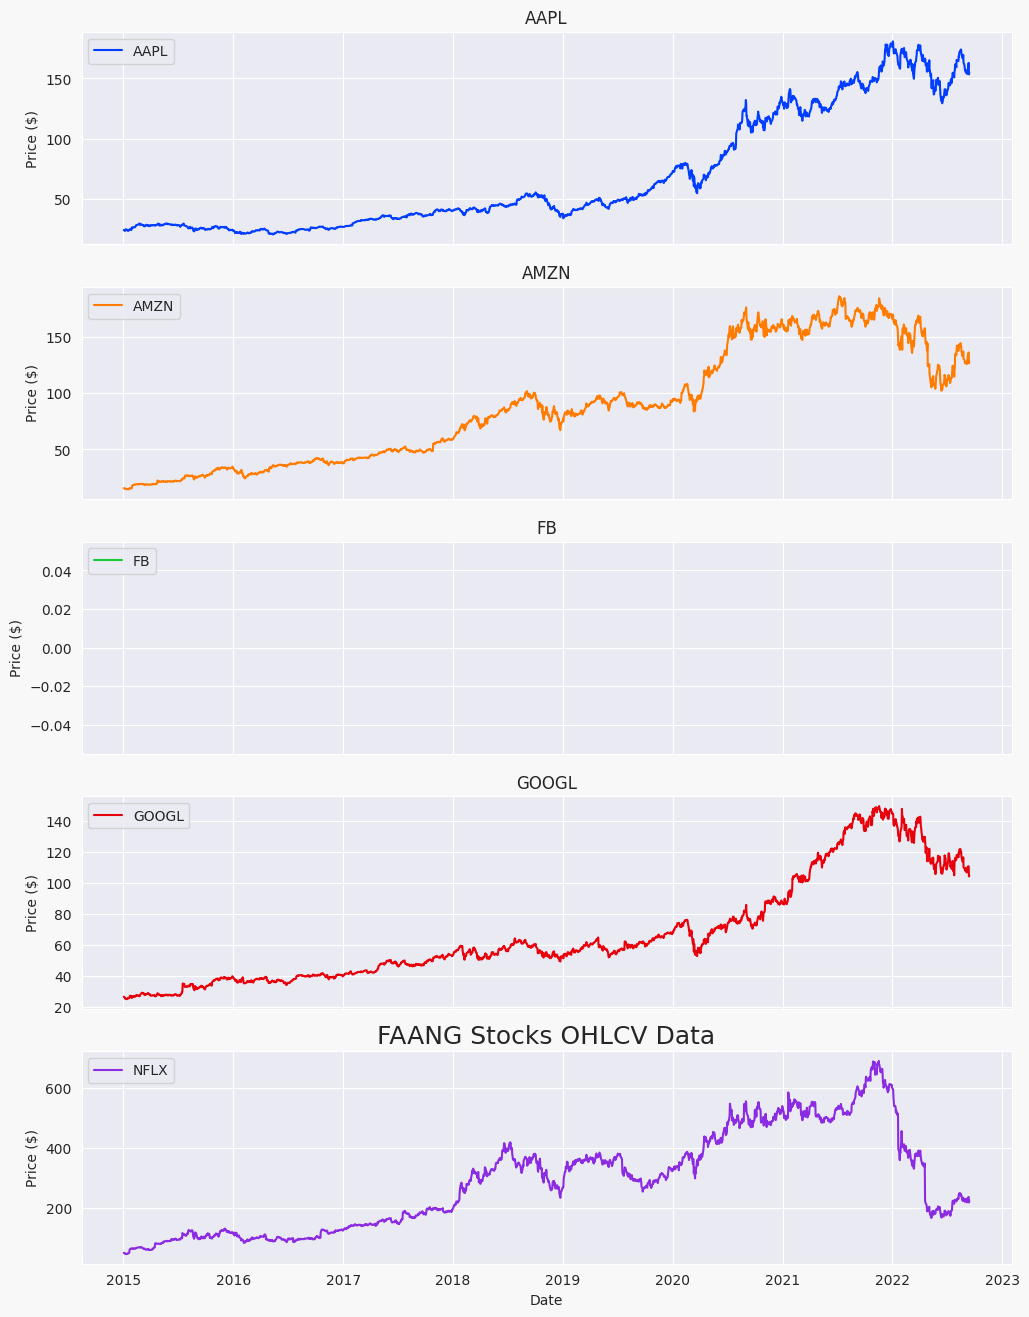

In [4]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

symbols = ['AAPL', 'AMZN', 'FB', 'GOOGL', 'NFLX']

data = pd.DataFrame()
for symbol in symbols:
    stock = yf.Ticker(symbol)
    stock_data = stock.history(period='max')[['Open', 'High', 'Low', 'Close', 'Volume']]
    stock_data['Symbol'] = symbol
    data = pd.concat([data, stock_data])

start_date = '2015-01-01'
end_date = '2022-09-14'
data = data.loc[(data.index >= start_date) & (data.index <= end_date)]

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 16), sharex=True)

sns.set_style("darkgrid")
palette = sns.color_palette("bright", len(symbols))

for symbol, ax, color in zip(symbols, axs, palette):
    stock_data = data[data['Symbol'] == symbol]
    ax.plot(stock_data.index, stock_data['Close'], label=symbol, color=color)
    ax.set_ylabel('Price ($)')
    ax.set_title(symbol)
    ax.legend(loc='upper left')

ax.set_xlabel('Date')
ax.set_title('FAANG Stocks OHLCV Data', fontsize=18)

fig.patch.set_facecolor('#f8f8f8')

plt.show()


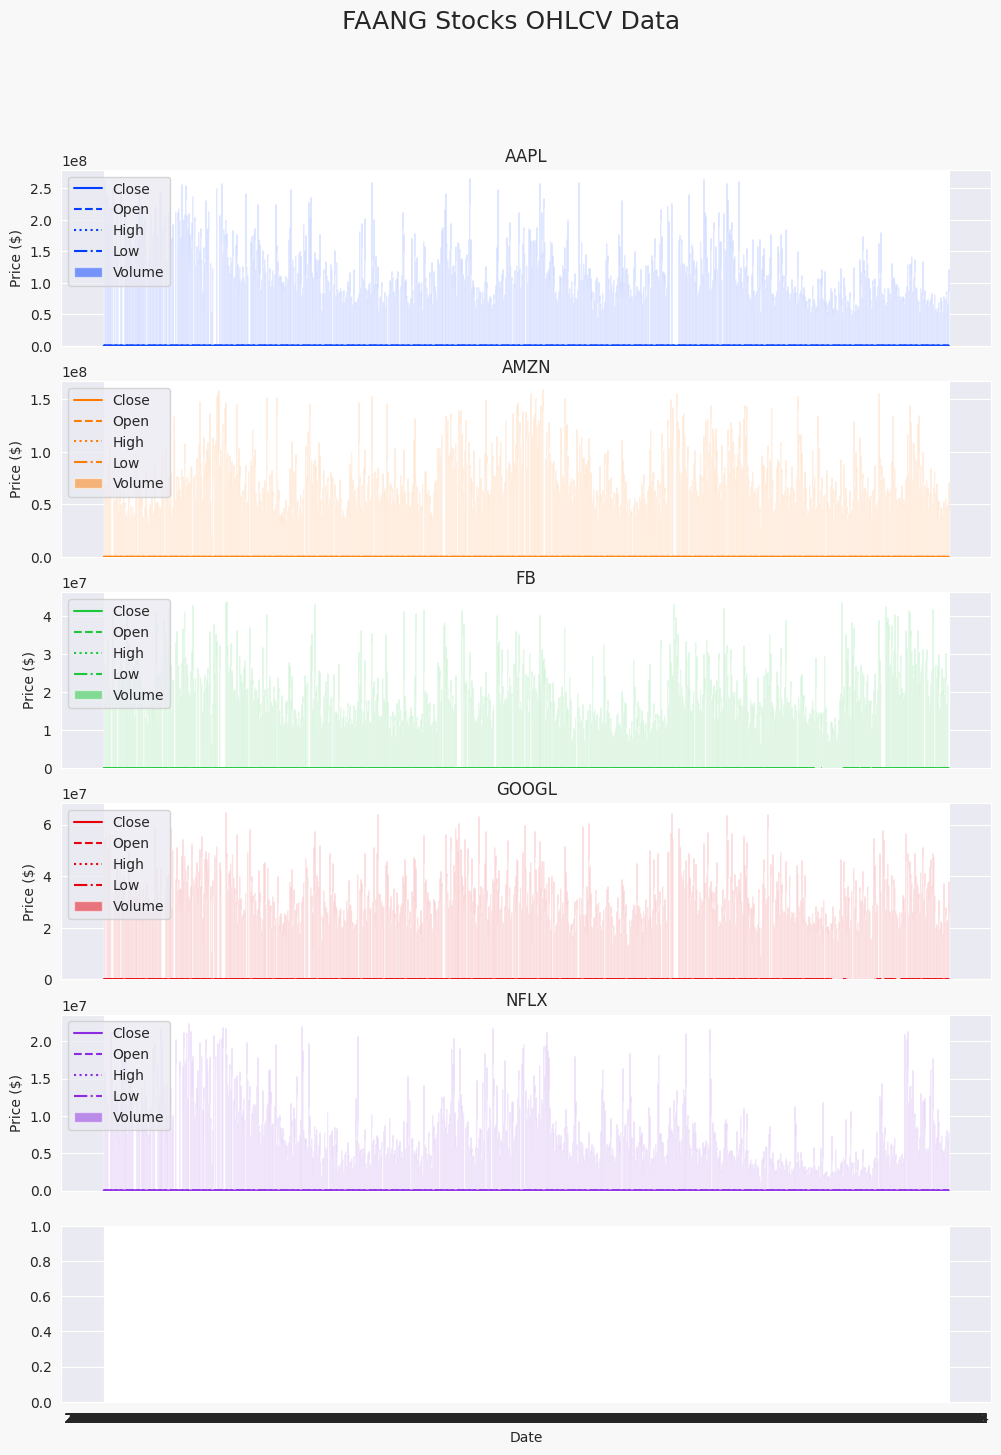

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('new_dataset.csv')

start_date = '2015-01-01'
end_date = '2022-09-14'
data = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

pivot = pd.pivot_table(data, values=['Open', 'High', 'Low', 'Close', 'Volume'], index='Date', columns='Symbol')

q1 = pivot.quantile(0.25)
q3 = pivot.quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
filtered = pivot[(pivot > lower_bound) & (pivot < upper_bound)]

fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(12, 16), sharex=True)

sns.set_style("darkgrid")
palette = sns.color_palette("bright", len(filtered.columns.levels[1]))

for i, (symbol, color) in enumerate(zip(filtered.columns.levels[1], palette)):
    stock_data = filtered.xs(symbol, level=1, axis=1)
    axs[i].plot(stock_data.index, stock_data['Close'], label='Close', color=color)
    axs[i].plot(stock_data.index, stock_data['Open'], label='Open', linestyle='--', color=color)
    axs[i].plot(stock_data.index, stock_data['High'], label='High', linestyle=':', color=color)
    axs[i].plot(stock_data.index, stock_data['Low'], label='Low', linestyle='-.', color=color)
    axs[i].bar(stock_data.index, stock_data['Volume'], label='Volume', alpha=0.5, color=color, width=1, align='center')
    axs[i].set_ylabel('Price ($)')
    axs[i].set_title(symbol)
    axs[i].legend(loc='upper left')

axs[-1].set_xlabel('Date')
fig.suptitle('FAANG Stocks OHLCV Data', fontsize=18)

fig.patch.set_facecolor('#f8f8f8')

plt.show()


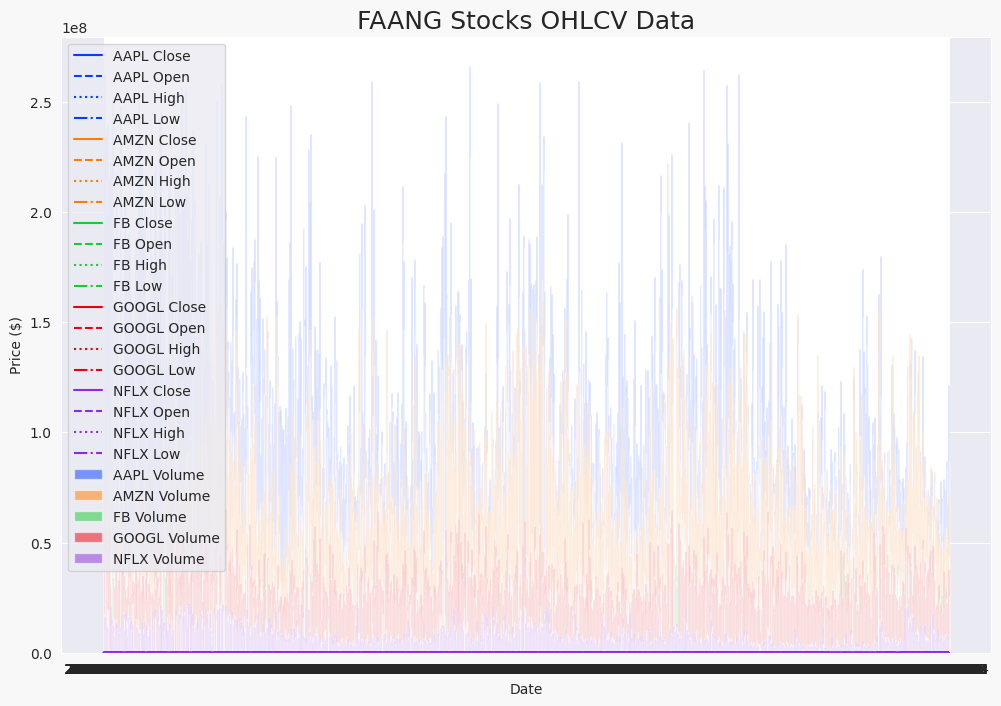

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('new_dataset.csv')

start_date = '2015-01-01'
end_date = '2022-09-14'
data = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

pivot = pd.pivot_table(data, values=['Open', 'High', 'Low', 'Close', 'Volume'], index='Date', columns='Symbol')

q1 = pivot.quantile(0.25)
q3 = pivot.quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
filtered = pivot[(pivot > lower_bound) & (pivot < upper_bound)]

fig, ax = plt.subplots(figsize=(12,8))

sns.set_style("darkgrid")
palette = sns.color_palette("bright", len(filtered.columns.levels[1]))

for i, (symbol, color) in enumerate(zip(filtered.columns.levels[1], palette)):
    stock_data = filtered.xs(symbol, level=1, axis=1)
    ax.plot(stock_data.index, stock_data['Close'], label=symbol + ' Close', color=color)
    ax.plot(stock_data.index, stock_data['Open'], label=symbol + ' Open', linestyle='--', color=color)
    ax.plot(stock_data.index, stock_data['High'], label=symbol + ' High', linestyle=':', color=color)
    ax.plot(stock_data.index, stock_data['Low'], label=symbol + ' Low', linestyle='-.', color=color)
    ax.bar(stock_data.index, stock_data['Volume'], label=symbol + ' Volume', alpha=0.5, color=color, width=1, align='center')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('FAANG Stocks OHLCV Data', fontsize=18)
ax.legend(loc='upper left')

fig.patch.set_facecolor('#f8f8f8')

plt.show()


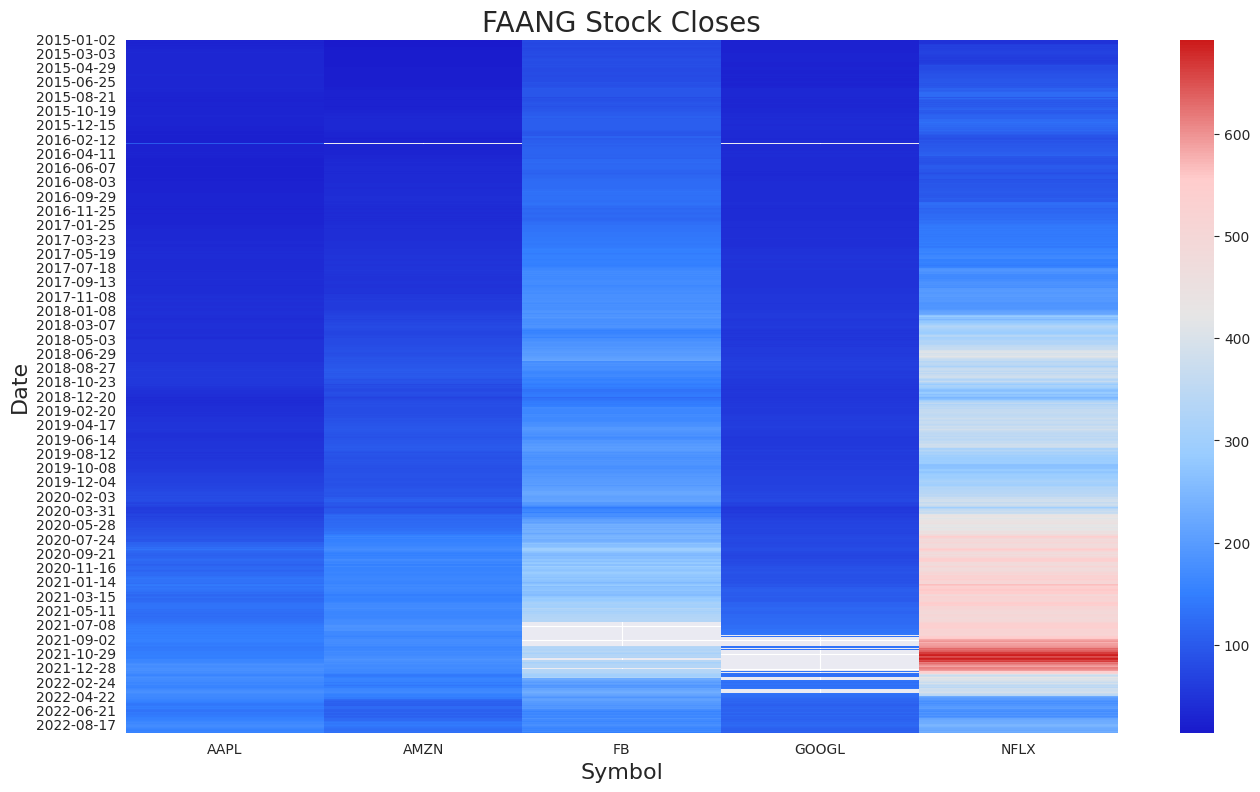

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

data = pd.read_csv('new_dataset.csv')

start_date = '2015-01-01'
end_date = '2022-09-14'
data = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

pivot = pd.pivot_table(data, values=['Open', 'High', 'Low', 'Close', 'Volume'], index='Date', columns='Symbol')

q1 = pivot.quantile(0.25)
q3 = pivot.quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
filtered = pivot[(pivot > lower_bound) & (pivot < upper_bound)]

close_colors = [(0.1, 0.1, 0.8), (0.2, 0.5, 1.0), (0.6, 0.8, 1.0), (0.9, 0.9, 0.9), (1.0, 0.8, 0.8), (0.8, 0.1, 0.1)]
open_colors = [(0.1, 0.1, 0.5), (0.2, 0.3, 0.8), (0.4, 0.6, 1.0), (1.0, 1.0, 1.0), (1.0, 0.6, 0.6), (0.8, 0.1, 0.1)]
high_colors = [(0.1, 0.1, 0.3), (0.2, 0.2, 0.6), (0.4, 0.4, 1.0), (0.9, 0.9, 1.0), (1.0, 0.4, 0.4), (0.8, 0.1, 0.1)]
low_colors = [(0.1, 0.1, 0.1), (0.2, 0.2, 0.2), (0.4, 0.4, 0.4), (0.7, 0.7, 0.7), (0.8, 0.2, 0.2), (0.8, 0.1, 0.1)]
volume_colors = [(0.1, 0.1, 0.1), (0.2, 0.2, 0.2), (0.4, 0.4, 0.4), (0.7, 0.7, 0.7), (0.8, 0.2, 0.2), (0.8, 0.1, 0.1)]

close_cmap = LinearSegmentedColormap.from_list('close', close_colors)
open_cmap = LinearSegmentedColormap.from_list('open', open_colors)
high_cmap = LinearSegmentedColormap.from_list('high', high_colors)
low_cmap = LinearSegmentedColormap.from_list('low', low_colors)
volume_cmap = LinearSegmentedColormap.from_list('volume', volume_colors)

fig, ax = plt.subplots(figsize=(16,9))
sns.heatmap(filtered['Close'], cmap=close_cmap, ax=ax)
plt.title('FAANG Stock Closes', fontsize=20)
plt.xlabel('Symbol', fontsize=16)
plt.ylabel('Date', fontsize=16)

plt.show()


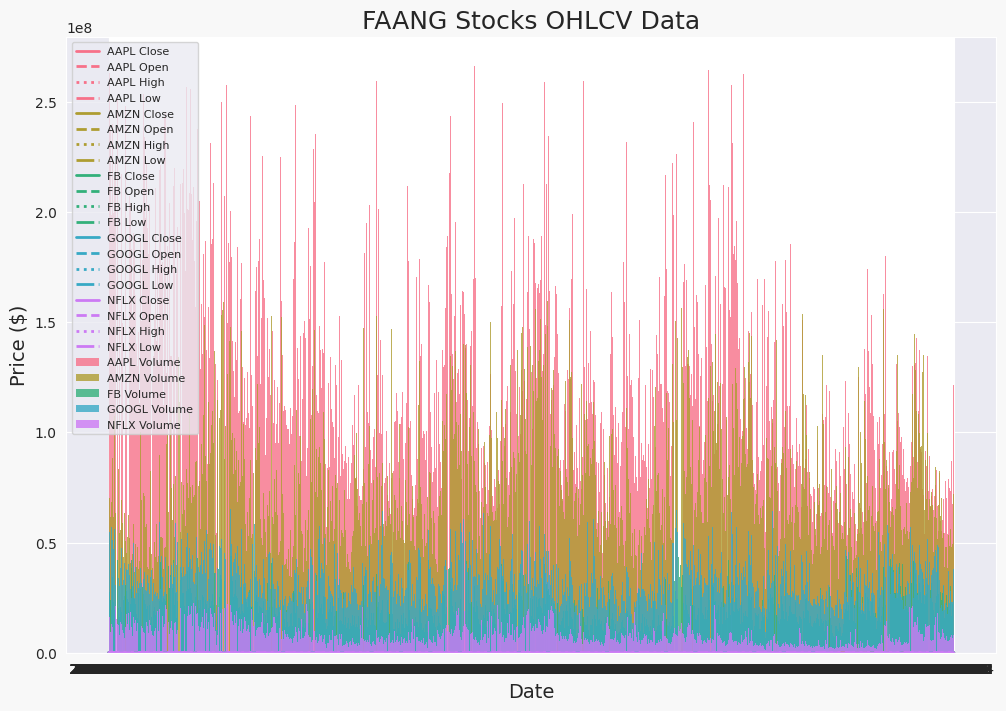

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('new_dataset.csv')

start_date = '2015-01-01'
end_date = '2022-09-14'
data = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

pivot = pd.pivot_table(data, values=['Open', 'High', 'Low', 'Close', 'Volume'], index='Date', columns='Symbol')

q1 = pivot.quantile(0.25)
q3 = pivot.quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
filtered = pivot[(pivot > lower_bound) & (pivot < upper_bound)]

fig, ax = plt.subplots(figsize=(12,8))

sns.set_style("darkgrid")
palette = sns.color_palette("husl", len(filtered.columns.levels[1]))

for i, (symbol, color) in enumerate(zip(filtered.columns.levels[1], palette)):
  stock_data = filtered.xs(symbol, level=1, axis=1)
  ax.plot(stock_data.index, stock_data['Close'], label=symbol + ' Close', color=color, linewidth=2)
  ax.plot(stock_data.index, stock_data['Open'], label=symbol + ' Open', linestyle='--', color=color, linewidth=2)
  ax.plot(stock_data.index, stock_data['High'], label=symbol + ' High', linestyle=':', color=color, linewidth=2)
  ax.plot(stock_data.index, stock_data['Low'], label=symbol + ' Low', linestyle='-.', color=color, linewidth=2)
  ax.bar(stock_data.index, stock_data['Volume'], label=symbol + ' Volume', alpha=0.8, color=color, width=1, align='center', edgecolor='none')

ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price ($)', fontsize=14)
ax.set_title('FAANG Stocks OHLCV Data', fontsize=18)
ax.legend(loc='upper left', fontsize=8)

fig.patch.set_facecolor('#f8f8f8')

plt.show()


In [12]:
import pandas as pd
from technical_generator import Generator

data = pd.read_csv('new_dataset.csv')

data['7ma'] = Generator().EMA(data['Close'], 7)
data['14ma'] = Generator().EMA(data['Close'], 14)
data['21ma'] = Generator().EMA(data['Close'], 21)
data['7macd'] = Generator().MACD(data['Close'], 3, 11, 7)
data['14macd'] = Generator().MACD(data['Close'], 7, 21, 14)
data['7rsi'] = Generator().RSI(data['Close'], 7)
data['14rsi'] = Generator().RSI(data['Close'], 14)
data['21rsi'] = Generator().RSI(data['Close'], 21)
data['7atr'] = Generator().atr(data['High'], data['Low'], 7)
data['14atr'] = Generator().atr(data['High'], data['Low'], 14)
data['21atr'] = Generator().atr(data['High'], data['Low'], 21)
data['7upper'], data['7lower'] = Generator().bollinger_band(data['Close'], 7)
data['14upper'], data['14lower'] = Generator().bollinger_band(data['Close'], 14)
data['21upper'], data['21lower'] = Generator().bollinger_band(data['Close'], 21)
data['7rsv'] = Generator().rsv(data['Close'], 7)
data['14rsv'] = Generator().rsv(data['Close'], 14)
data['21rsv'] = Generator().rsv(data['Close'], 21)

data.to_csv('new_dataset_with_indicators.csv', index=False)


In [13]:
data.head()


,Date,Open,High,Low,Close,Volume,Symbol,7ma,14ma,21ma,...,21atr,7upper,7lower,14upper,14lower,21upper,21lower,7rsv,14rsv,21rsv
0,2015-01-02,27.85,27.86,26.84,27.33,212818496,AAPL,27.330000,27.330000,27.330000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,27.07,27.16,26.35,26.56,257141968,AAPL,26.890000,26.917500,26.926667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-06,26.64,26.86,26.16,26.57,263188464,AAPL,26.751622,26.784754,26.796284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-07,26.80,27.05,26.67,26.94,160423744,AAPL,26.820514,26.832248,26.837501,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-08,27.31,28.04,27.18,27.97,237458192,AAPL,27.197298,27.129086,27.109092,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


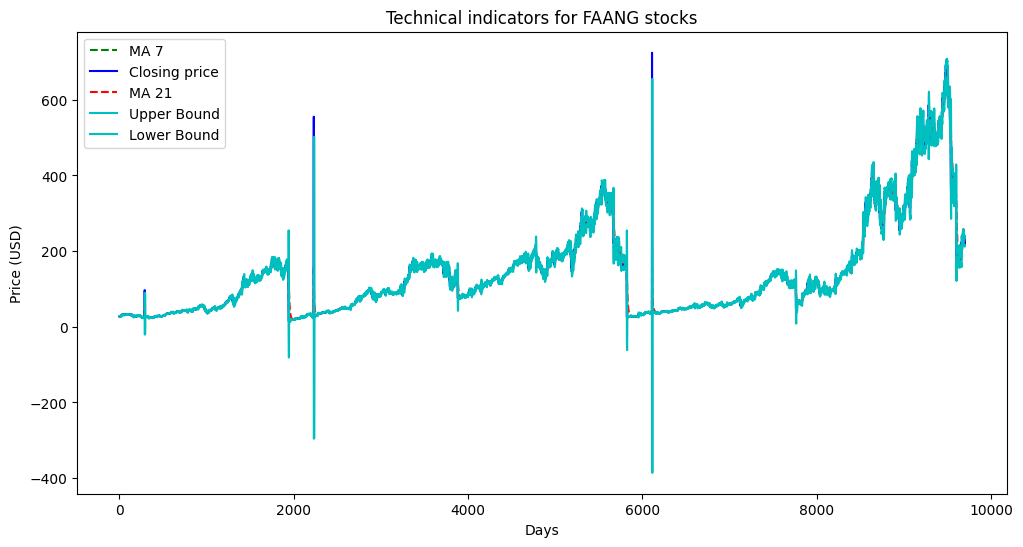

In [15]:
x_ = np.arange(data.shape[0])
plt.figure(figsize=(12, 6))
plt.plot(data['7ma'].values, label='MA 7', color='g', linestyle='--')
plt.plot(data['Close'].values, label='Closing price', color='b')
plt.plot(data['21ma'].values, label='MA 21', color='r', linestyle='--')
plt.plot(data['7upper'].values, label='Upper Bound', color='c')
plt.plot(data['7lower'].values, label='Lower Bound', color='c')
plt.fill_between(x_, data['7lower'].values, data['7upper'].values, alpha=0.35)
plt.title('Technical indicators for FAANG stocks')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting c

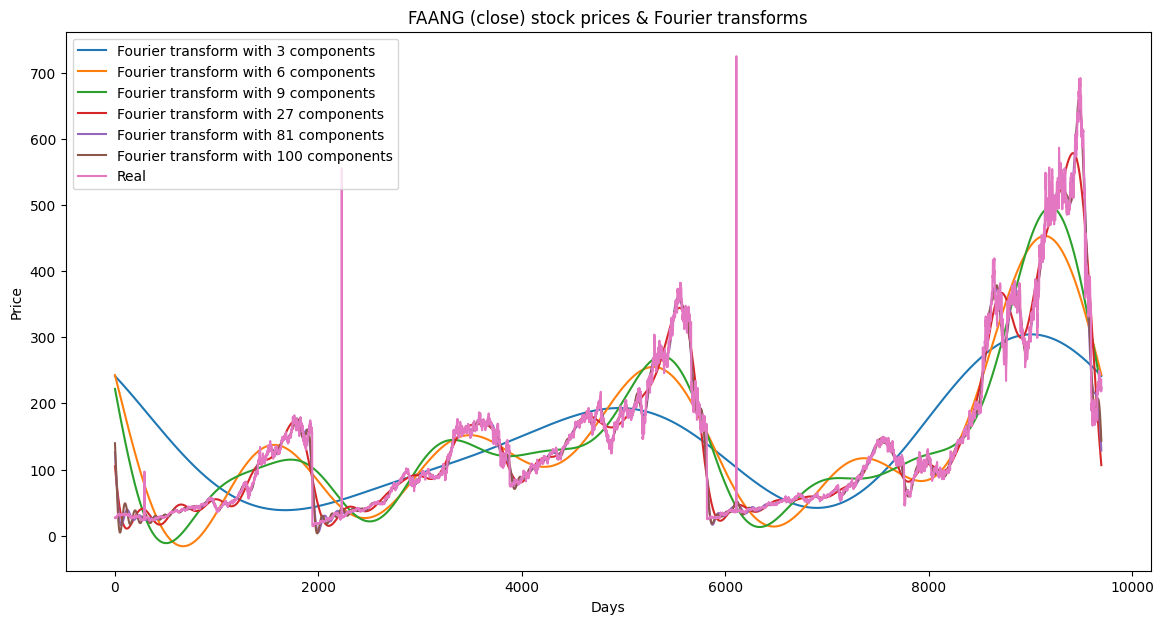

In [16]:
close_fft = np.fft.fft(np.asarray(data['Close'].tolist()))
fft_df = pd.DataFrame({'fft': close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 27, 81, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_] = 0
    data[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10)
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data['Close'].values,  label='Real')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('FAANG (close) stock prices & Fourier transforms')
plt.legend()
plt.show()